In [30]:
import pandas as pd;
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt;
import datetime;
import seaborn as sns;
import numpy as np
from scipy import stats


In [31]:
all_countries = ['average','AR', 'BD', 'BR', 'CO', 'DE', 'EG', 'FR', 'GB', 'ID', 'IN', 'IT', 'JP', 'MX', 'MY', 'NG', 'PH', 'PK', 'PL', 'RO', 'TH', 'TR', 'US', 'VN']
all_dates = ['2020-07-06', '2020-07-20', '2020-08-03', '2020-08-17', '2020-08-31', '2020-09-14', '2020-09-28', '2020-10-12', '2020-10-26', '2020-11-09', '2020-11-23', '2020-12-07', '2020-12-21', '2021-01-04', '2021-01-18', '2021-02-01', '2021-02-15', '2021-03-01', '2021-03-15'];
lowess = sm.nonparametric.lowess

In [32]:
f = open("data/waves_snapshot_countries.txt");
lines = f.readlines();
dict_countries_mapping = {};
dict_all_countries = {};

for line in lines:
    line = line.strip();
    line_split = line.split(",");
    dict_all_countries[line_split[0]] = 1;
    if(line_split[2]=="waves"):
        dict_countries_mapping[line_split[1]] = line_split[0];
        
dict_countries_mapping["Average"] = "average";
def convertToCountryCode(country):
    return dict_countries_mapping[country];

In [33]:
# waves to dates mapping
dict_dates = {};
dict_month = {"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec"};
start0 = datetime.datetime.strptime("2020-07-06","%Y-%m-%d")
start = datetime.datetime.strptime("2020-07-06","%Y-%m-%d")
for i in range(1,20):
    end = datetime.timedelta(days=13)
    end1 = datetime.timedelta(days=14)
    date_str = str(start).split(" ")[0];
    date_str2 = str(start + end).split(" ")[0];
    start = start + end1;

    date1 = date_str.split("-")[0] + "-" + date_str.split("-")[1] + "-" + date_str.split("-")[2];
    date2 = date_str2.split("-")[2] + "-" + date_str2.split("-")[1] + "-" + date_str2.split("-")[0];

    dict_dates[str(i)] = date1;# + " - " + date2;
    
def convertWaveToDate(wave):
    return dict_dates[wave.replace("wave","")];
def convertWaveToDate1(wave):
    return dict_dates[str(wave)];

# plot vaccine acceptance and vaccine norms over time

In [1]:
# ## uses data from questions "vaccine_accept: If a vaccine for COVID-19 becomes available, would you choose to get vaccinated?"
## and "norms_vaccine: Out of 100 people in your community, how many do you think would take the COVID-19 vaccine if it were made available?"

In [34]:
# generate plots with error bars

data = pd.read_csv("data/vaccine_accept_timeseries_weighted_bootstrap_mean.txt")
data1 = data.T
data1.columns = list(data["country"])
data2 = data1.reset_index()
data2 = data2.drop([0])
data_weighted = data2.rename(columns={"index": "wave"});
data_weighted["wave"] = data_weighted["wave"].apply(convertWaveToDate);
col = data_weighted.loc[: , "AR":"VN"]
data_weighted['average'] = col.mean(axis=1)

data_sem = pd.read_csv("data/vaccine_accept_timeseries_weighted_bootstrap_sem.txt")
data1_sem = data_sem.T
data1_sem.columns = list(data_sem["country"])
data2_sem = data1_sem.reset_index()
data2_sem = data2_sem.drop([0])
data_weighted_sem = data2_sem.rename(columns={"index": "wave"});
data_weighted_sem["wave"] = data_weighted_sem["wave"].apply(convertWaveToDate);
col = data_weighted_sem.loc[: , "AR":"VN"]
data_weighted_sem['average'] = col.mean(axis=1)
data_weighted_sem.head()

,wave,AR,BD,BR,CO,DE,EG,FR,GB,ID,...,NG,PH,PK,PL,RO,TH,TR,US,VN,average
1,2020-07-06,0.00157036,0.00254415,0.00159359,0.00159563,0.00216426,0.00203493,0.00176602,0.00151675,0.00195057,...,0.00223556,0.00209965,0.00258741,0.00171664,0.00190586,0.00165408,0.00220704,0.00234343,0.00180232,0.001968
2,2020-07-20,0.0012507,0.0020737,0.0012083,0.00175296,0.00163717,0.00201654,0.00147177,0.00144987,0.00187544,...,0.00288268,0.00226626,0.00232568,0.00166918,0.00198245,0.00161879,0.00184316,0.00171146,0.00155875,0.001877
3,2020-08-03,0.00182973,0.00233748,0.00144822,0.00166318,0.0016994,0.00246368,0.00156043,0.00139848,0.00203177,...,0.00239931,0.00241109,0.00305268,0.00155063,0.00179001,0.0014537,0.00184366,0.00167416,0.00145161,0.001907
4,2020-08-17,0.00188955,0.00248225,0.0017635,0.00186756,0.00222621,0.00265443,0.00202953,0.00182238,0.00198273,...,0.00243951,0.00248356,0.00246942,0.00191429,0.00232881,0.0021945,0.00210778,0.00202612,0.00201248,0.002171
5,2020-08-31,0.0020722,0.00252995,0.00159931,0.00218711,0.00198979,0.00267904,0.00181811,0.00189965,0.00219506,...,0.00237512,0.00249305,0.00338725,0.00214492,0.00240871,0.00204832,0.00246688,0.00214605,0.00262828,0.002229


In [35]:
data = pd.read_csv("data/vaccine_norms_timeseries_bootstrap_mean.txt")
data1 = data.T
data1.columns = list(data["country"])
data2 = data1.reset_index()
data2 = data2.drop([0])
data_vaccine_norms = data2.rename(columns={"index": "wave"});
data_vaccine_norms["wave"] = data_vaccine_norms["wave"].apply(convertWaveToDate);
col = data_vaccine_norms.loc[: , "AR":"VN"]
data_vaccine_norms['average'] = col.mean(axis=1)


data_sem = pd.read_csv("data/vaccine_norms_timeseries_bootstrap_sem.txt")
data1_sem = data_sem.T
data1_sem.columns = list(data_sem["country"])
data2_sem = data1_sem.reset_index()
data2_sem = data2_sem.drop([0])
data_vaccine_norms_sem = data2_sem.rename(columns={"index": "wave"});
data_vaccine_norms_sem["wave"] = data_vaccine_norms_sem["wave"].apply(convertWaveToDate);
col = data_vaccine_norms_sem.loc[: , "AR":"VN"]
data_vaccine_norms_sem['average'] = col.mean(axis=1)


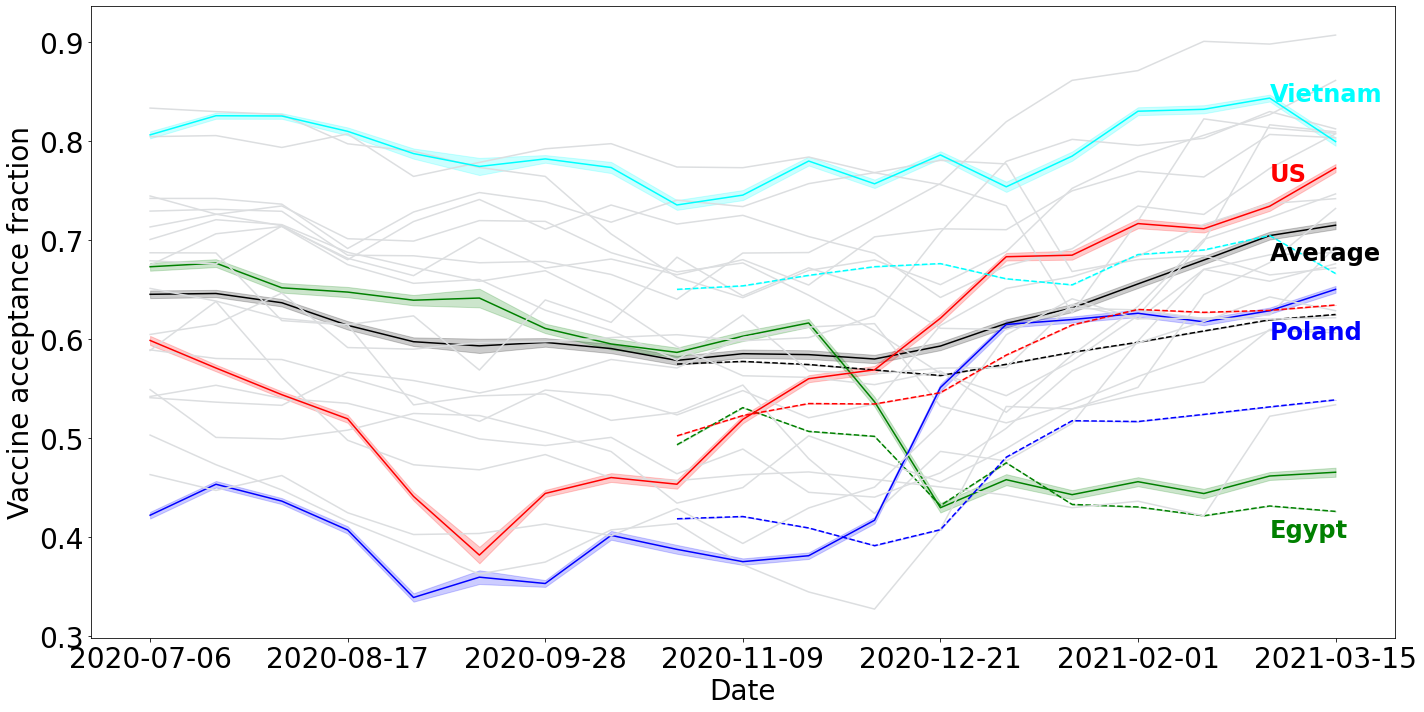

In [36]:
fig, ax = plt.subplots(figsize=[20,10])

for country in all_countries:
    y = data_weighted[country]
    x = range(len(y))
    fill = data_weighted_sem[country];
    
    if(country=="average"):
        plt.plot(x,y,color='black',label='acceptance')
        plt.fill_between(x, y - 1.96*fill, y + 1.96*fill, color='black', alpha=0.2)
    elif(country=="US"):
        plt.plot(x,y,color='red')
        bottom = np.array(y,dtype=float) - 1.96*np.array(fill,dtype=float);
        top = np.array(y,dtype=float) + 1.96*np.array(fill,dtype=float);
        plt.fill_between(x, bottom, top, color='red', alpha=0.2)
    elif(country=="EG"):
        plt.plot(x,y,color='green')
        plt.fill_between(x, np.array(y,dtype=float) - 1.96*np.array(fill,dtype=float), 
                         np.array(y,dtype=float) + 1.96*np.array(fill,dtype=float), color='green', alpha=0.2)
    elif(country=="PL"):
        plt.plot(x,y,color='blue')
        plt.fill_between(x, np.array(y,dtype=float) - 1.96*np.array(fill,dtype=float), 
                         np.array(y,dtype=float) + 1.96*np.array(fill,dtype=float), color='blue', alpha=0.2)
    elif(country=="VN"):
        plt.plot(x,y,color='cyan')
        plt.fill_between(x, np.array(y,dtype=float) - 1.96*np.array(fill,dtype=float), 
                         np.array(y,dtype=float) + 1.96*np.array(fill,dtype=float), color='cyan', alpha=0.2)
    else:
        plt.plot(x,y,color='#dcdee0')
        
    y1 = data_vaccine_norms[country]
    x1 = range(8,len(y1)+8)
    fill1 = data_vaccine_norms_sem[country];
    
    if(country=="average"):
        plt.plot(x1,y1,'--',color='black',label='norms')
        plt.fill_between(x1, y1 - fill1, y1 + fill1, color='black', alpha=0.2)
    elif(country=="US"):
        plt.plot(x1,y1,'--',color='red')
        plt.fill_between(x1, np.array(y1,dtype=float) - 1.96*np.array(fill1,dtype=float), 
                         np.array(y1,dtype=float) + 1.96*np.array(fill1,dtype=float), color='red', alpha=0.2)
    elif(country=="EG"):
        plt.plot(x1,y1,'--',color='green')
        plt.fill_between(x1, np.array(y1,dtype=float) - 1.96*np.array(fill1,dtype=float), 
                         np.array(y1,dtype=float) + 1.96*np.array(fill1,dtype=float), color='green', alpha=0.2)
    elif(country=="PL"):
        plt.plot(x1,y1,'--',color='blue')
        plt.fill_between(x1, np.array(y1,dtype=float) - 1.96*np.array(fill1,dtype=float), 
                         np.array(y1,dtype=float) + 1.96*np.array(fill1,dtype=float), color='blue', alpha=0.2)
    elif(country=="VN"):
        plt.plot(x1,y1,'--',color='cyan')
        plt.fill_between(x1, np.array(y1,dtype=float) - 1.96*np.array(fill1,dtype=float), 
                         np.array(y1,dtype=float) + 1.96*np.array(fill1,dtype=float), color='cyan', alpha=0.2)

dates_x_axis = []
x_ticks = []
for ix in range(0,len(all_dates),3):
    dates_x_axis.append(all_dates[ix]);
    x_ticks.append(ix);

ax.set_xticks(x_ticks)
ax.set_xticklabels(dates_x_axis,rotation=0,fontsize=25)

plt.ylabel("Vaccine acceptance fraction",fontsize=28);
ax.annotate('Average', (17, 0.68), fontsize=24,weight='bold')
ax.annotate('Poland', (17, 0.60), fontsize=24,weight='bold',color="blue")
ax.annotate('Vietnam', (17, 0.84), fontsize=24,weight='bold',color="cyan")
ax.annotate('US', (17, 0.76), fontsize=24,weight='bold',color="red")
ax.annotate('Egypt', (17, 0.40), fontsize=24,weight='bold',color="green")
plt.xlabel("Date",fontsize=28);
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)
plt.tight_layout()
plt.savefig("figs/vaccine_acceptance_vs_norms_waves.jpg")
plt.show()

In [37]:
# same plot as above but for each country (Appendix)

<ipython-input-38-856dfeda6a0f>:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


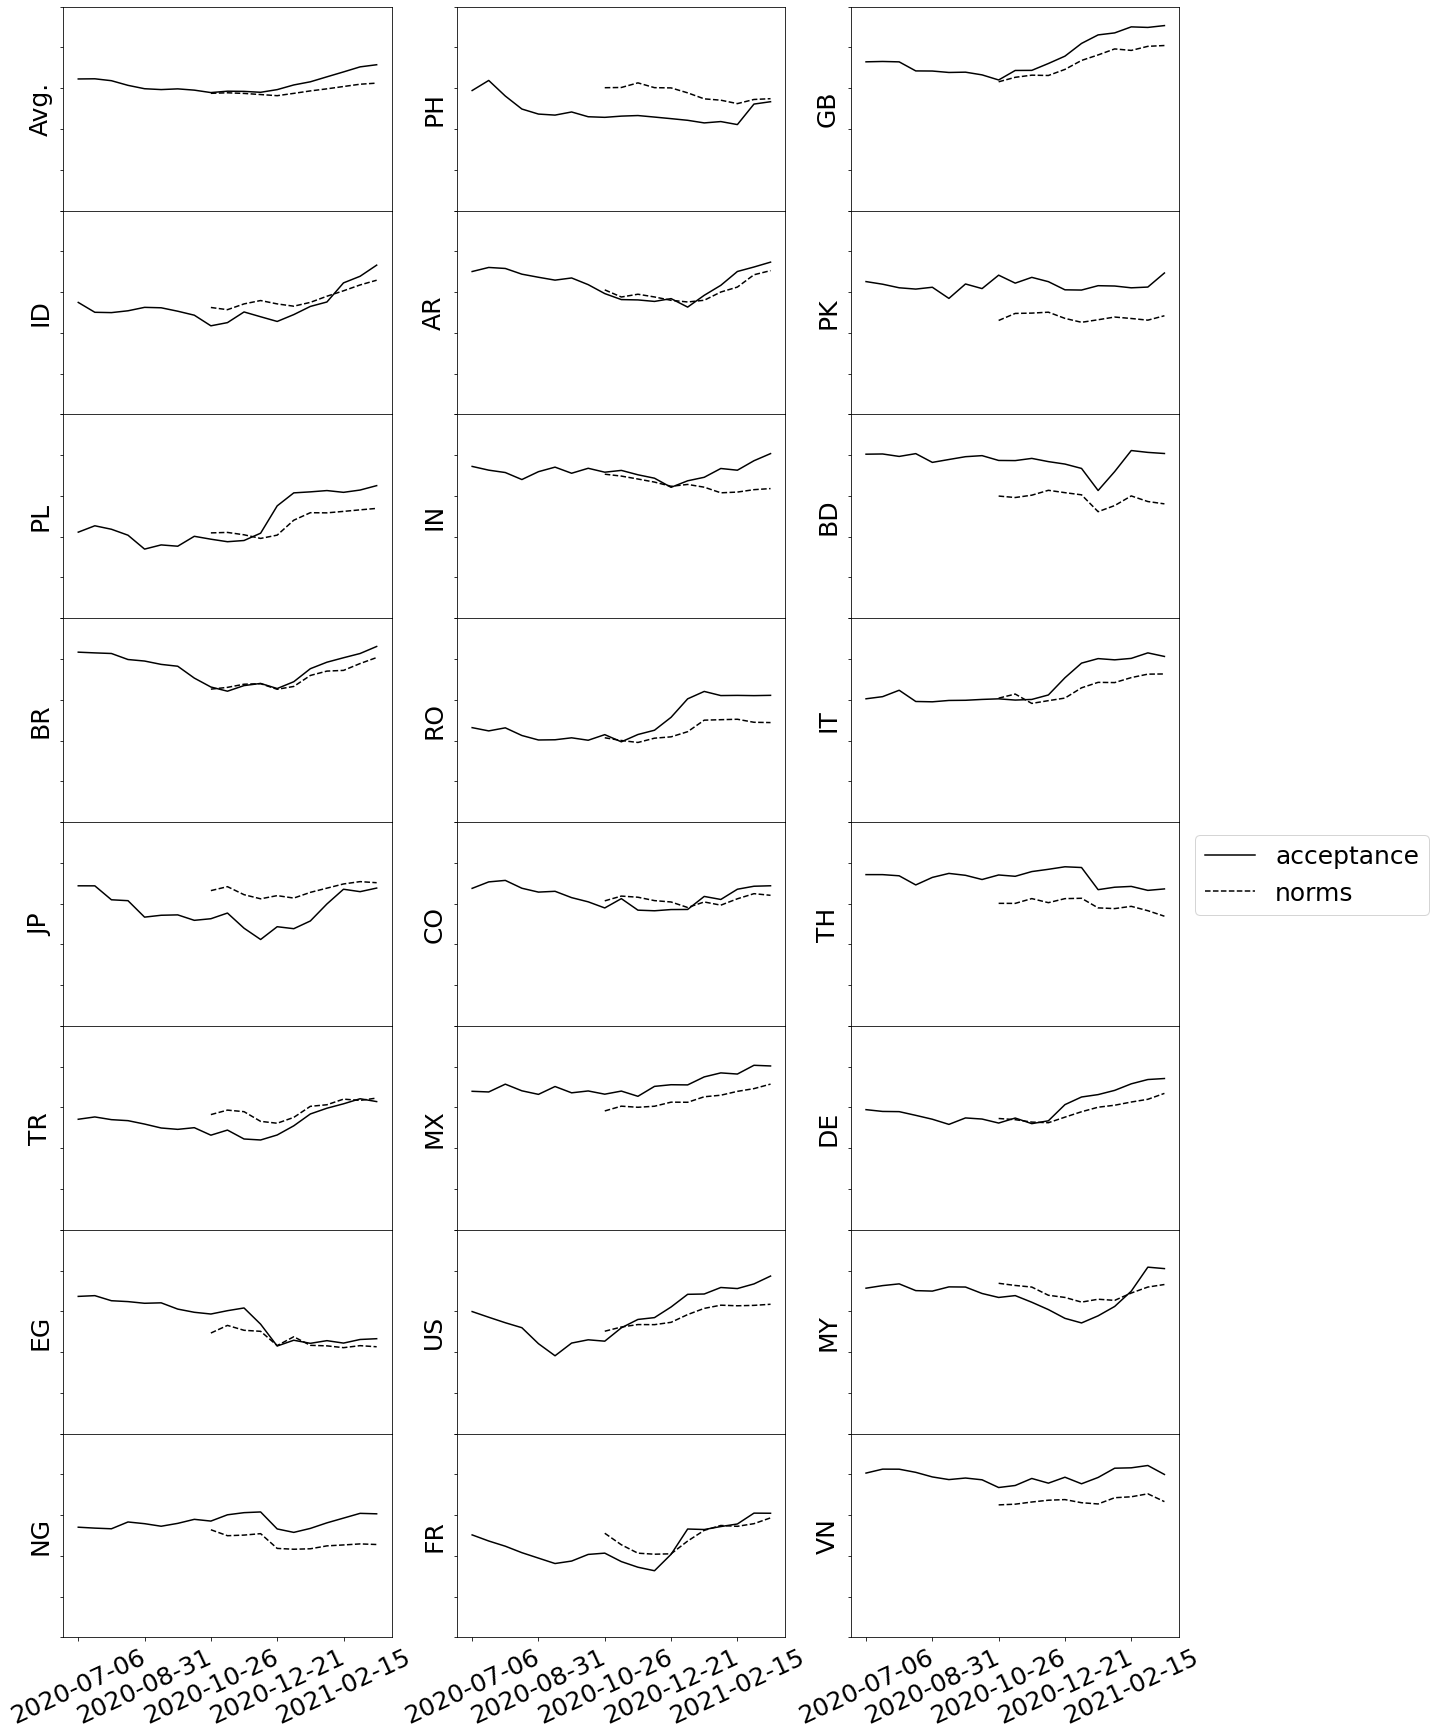

In [38]:
fig = plt.figure(figsize=[20,30])
#fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=[20,8])
gs = fig.add_gridspec(8, 3, hspace=0)
axs = gs.subplots(sharex=True)

i = 0; j = 0;
index = 0;
dates_x_axis = []
x_ticks = []
for ix in range(0,len(all_dates),4):
    dates_x_axis.append(all_dates[ix]);
    x_ticks.append(ix);

for country in all_countries:
    y = data_weighted[country]
    x = np.array(range(len(y)))
#    z = lowess(y, x)
    z = np.array(y)
    y1 = data_vaccine_norms[country]
    x1 = range(8,len(y1)+8)
    z1 = y1;

    fill = np.array(data_weighted_sem[country]);
    #print("XXXX",x,z,fill)
    axs[i,j].plot(x,z,color='black',label='acceptance')
    axs[i,j].plot(x1,y1,'--',color='black',label='norms')

    #print(country,i,j)
    axs[i,j].set_yticklabels([])
    axs[i,j].set_xticklabels([])
    axs[i,j].set_xlabel("")
    axs[i,j].set_ylim(0,1)
    if(all_countries[index]=="average"):
            axs[i,j].set_ylabel("Avg.",fontsize=25)
    else:
        axs[i,j].set_ylabel(all_countries[index],fontsize=25)

    if(i==7):
        axs[i,j].set_xticks(x_ticks)
        axs[i,j].set_xticklabels(dates_x_axis,rotation=25,fontsize=25)

    i += 1;
    j += 1;
    i = i%8;
    j = j%3;
    index += 1;


handles, labels = axs[0,0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right',fontsize=25)
plt.legend(handles=handles, bbox_to_anchor=(1.01, 4), loc='upper left',fontsize=25);#, prop=fontP)
plt.xlabel("")
plt.minorticks_off()
plt.tight_layout()


plt.savefig("figs/vaccine_acceptance_vs_norms_waves_all.jpg")
plt.show()

# plot the vaccine norms vs. vaccine acceptance

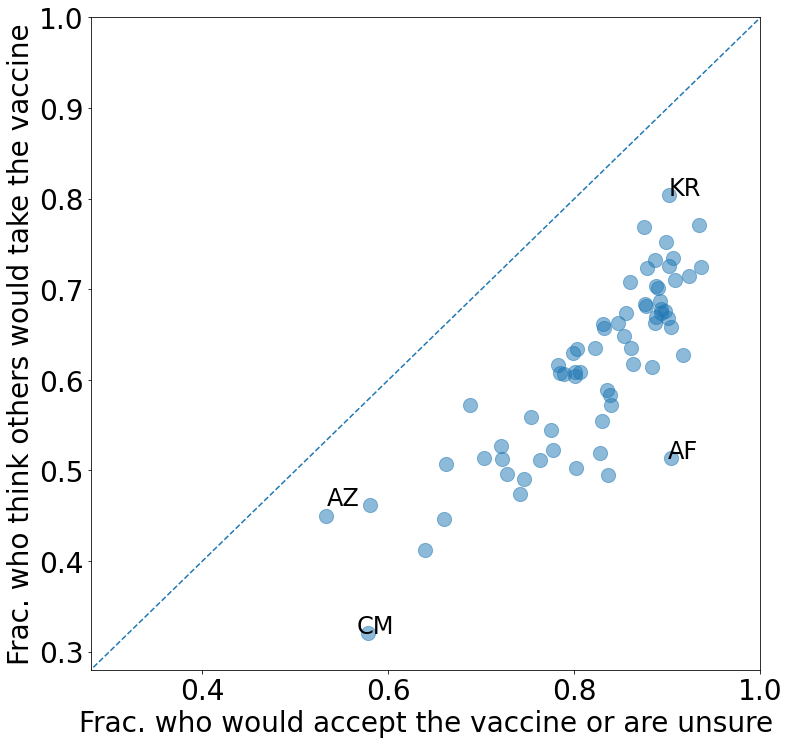

In [39]:
data = pd.read_csv("data/vaccine_accept_vaccine_norms_waves_and_snapshot.txt")
fig, ax = plt.subplots(figsize=[12,12])

plt.scatter(data["vaccine_accept"],data["norms_vaccine"],s=200,alpha=0.5)
plt.plot([0,1],[0,1],'--')
plt.xlim(0.28,1.0)
plt.ylim(0.28,1)

plt.xlabel("Frac. who would accept the vaccine or are unsure",fontsize=28);
plt.ylabel("Frac. who think others would take the vaccine",fontsize=28);
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)
ax.annotate('CM', (0.5653137757832447,0.3205451761230267), fontsize=24)
ax.annotate('AF', (0.9002820336019702,0.5136136637160527), fontsize=24)
ax.annotate('AZ', (0.5341347462650672,0.46172819898896156), fontsize=24)
ax.annotate('KR', (0.9017845010681752,0.8035549752521954), fontsize=24)

plt.savefig("figs/vaccine_acceptance_vs_norms_snapshot.jpg")
plt.show()

# plot stacked area charts of vaccine acceptance

<ipython-input-40-42879dda8a77>:45: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


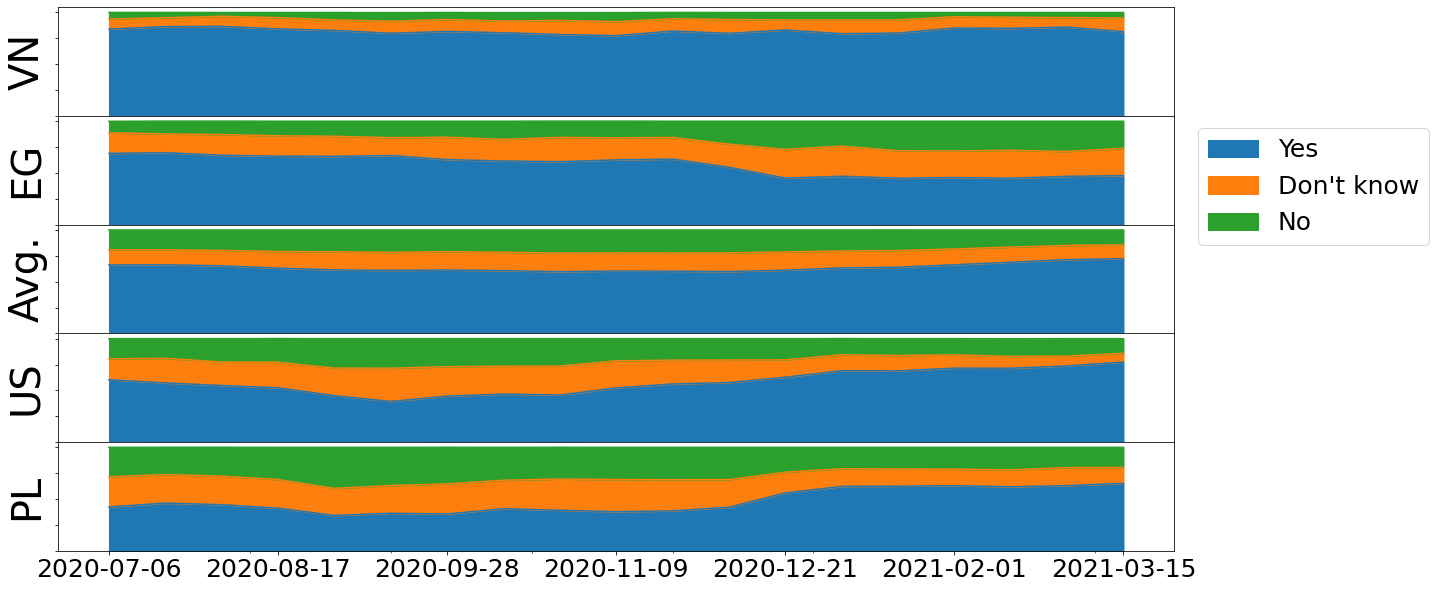

In [40]:
fig = plt.figure(figsize=[20,10])
gs = fig.add_gridspec(5, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

data = pd.read_csv("data/vaccine_accept_stacked_area.csv")
data["wave"] = data["wave"].apply(convertWaveToDate1);
data_VN = data[data["country"]=="VN"];
data_VN = data_VN.drop(['country'], axis=1).set_index("wave")
data_VN.plot.area(ax=axs[0],legend=False)

data_EG = data[data["country"]=="EG"];
data_EG = data_EG.drop(['country'], axis=1).set_index("wave")
data_EG.plot.area(ax=axs[1],legend=False)

data_average = data[data["country"]=="average"];
data_average = data_average.drop(['country'], axis=1).set_index("wave")
data_average.plot.area(ax=axs[2],legend=False)

data_US = data[data["country"]=="US"];
data_US = data_US.drop(['country'], axis=1).set_index("wave")
data_US.plot.area(ax=axs[3],legend=False)
data_PL = data[data["country"]=="PL"];
data_PL = data_PL.drop(['country'], axis=1).set_index("wave")
data_PL.plot.area(ax=axs[4],legend=False)

axs[1].set_yticklabels([])
i = 0
lis = ["VN","EG","Avg.","US","PL"]
for ax in axs.reshape(-1): 
    ax.set_ylabel(lis[i],fontsize=40)
    i += 1
    
dates_x_axis = []
x_ticks = []
for ix in range(0,len(all_dates),3):
    dates_x_axis.append(all_dates[ix]);
    x_ticks.append(ix);

axs[4].set_xticks(x_ticks)
axs[4].set_xticklabels(dates_x_axis,rotation=0,fontsize=25)

handles, labels = axs[0].get_legend_handles_labels()
plt.legend(handles=handles, bbox_to_anchor=(1.01, 4), loc='upper left',fontsize=25);#, prop=fontP)
plt.xlabel("")
plt.tight_layout()

plt.savefig("figs/vaccine_stacked_plot.jpg")

# show the graph
plt.show()


<ipython-input-41-035983088dd4>:43: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


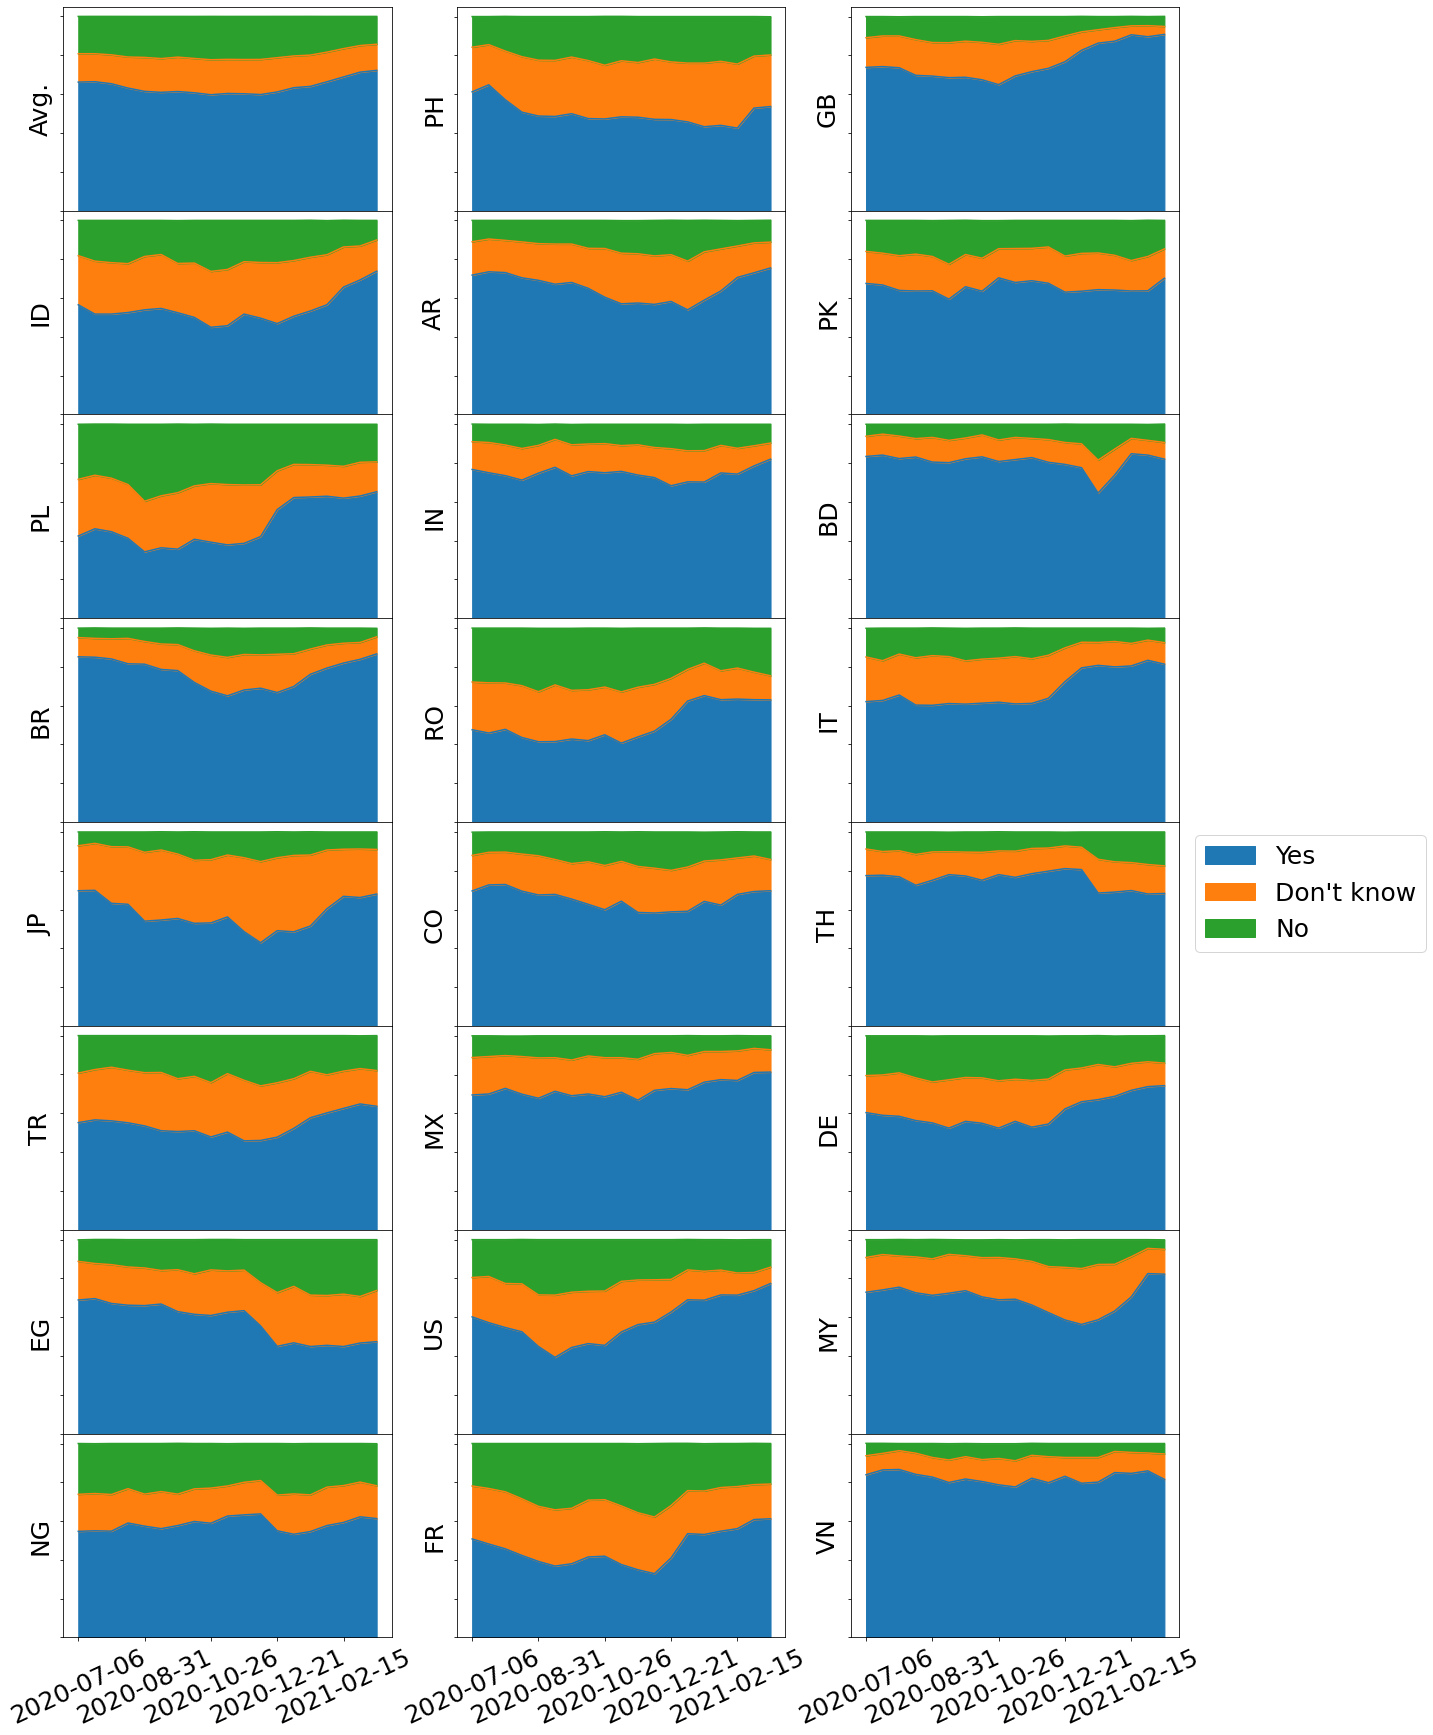

In [41]:
# Same figure for all the countries, in the Appendix
fig = plt.figure(figsize=[20,30])
gs = fig.add_gridspec(8, 3, hspace=0)
axs = gs.subplots(sharex=True)

data = pd.read_csv("data/vaccine_accept_stacked_area.csv")
data["wave"] = data["wave"].apply(convertWaveToDate1);

i = 0; j = 0;
index = 0;
dates_x_axis = []
x_ticks = []
for ix in range(0,len(all_dates),4):
    dates_x_axis.append(all_dates[ix]);
    x_ticks.append(ix);

for country in all_countries:
    data_country = data[data["country"]==country];
    data_country = data_country.drop(['country'], axis=1).set_index("wave")
    data_country.plot.area(ax=axs[i,j],legend=False)
    axs[i,j].set_yticklabels([])
    axs[i,j].set_xticklabels([])
    axs[i,j].set_xlabel("")
    if(all_countries[index]=="average"):
            axs[i,j].set_ylabel("Avg.",fontsize=25)
    else:
        axs[i,j].set_ylabel(all_countries[index],fontsize=25)

    if(i==7):
        axs[i,j].set_xticks(x_ticks)
        axs[i,j].set_xticklabels(dates_x_axis,rotation=25,fontsize=25)

    i += 1;
    j += 1;
    i = i%8;
    j = j%3;
    index += 1;
        
handles, labels = axs[0,0].get_legend_handles_labels()
plt.legend(handles=handles, bbox_to_anchor=(1.01, 4), loc='upper left',fontsize=25);#, prop=fontP)
plt.xlabel("")
plt.minorticks_off()
plt.tight_layout()

plt.savefig("figs/vaccine_stacked_plot_all.jpg")

# show the graph
plt.show()

# plot mismatch between beliefs and norms

In [2]:
## uses data from questions "community_action_importance: How important is it for you to take actions to prevent the spread of COVID-19 in your community?
## and community_action_norms: How important do other people in your community think it is to take actions to prevent the spread of COVID-19?"

In [42]:
f = open("data/mismatch_index_raw_data.txt")
lines = f.readlines();

data = [];
dict_matrix = {};
dict_country = {};
for line in lines[1:]:
    line = line.strip();
    line_split = line.split(",");
    what_i_think = line_split[2];
    what_others_think = line_split[3];
    if(what_i_think=="-1" or what_i_think=="-2" or what_others_think=="-1" or what_others_think=="-2"
       or what_i_think=="" or what_others_think==""):
        continue;
    try:
        weight = float(line_split[1]);
    except:
        continue;
    country = line_split[0];
    
    #if(country!="BR"):
    #    continue;
    if(country in dict_country):
        dict_matrix = dict_country[country];
        if(what_i_think in dict_matrix):
            tmp = dict_matrix[what_i_think];
            if(what_others_think in tmp):
                tmp[what_others_think] += weight;
            else:
                tmp[what_others_think] = weight;
            dict_matrix[what_i_think] = tmp;
        else:
            tmp = {};
            tmp[what_others_think] = weight;
            dict_matrix[what_i_think] = tmp;
        dict_country[country] = dict_matrix;
    else:
        dict_matrix = {};
        if(what_i_think in dict_matrix):
            tmp = dict_matrix[what_i_think];
            if(what_others_think in tmp):
                tmp[what_others_think] += weight;
            else:
                tmp[what_others_think] = weight;
            dict_matrix[what_i_think] = tmp;
        else:
            tmp = {};
            tmp[what_others_think] = weight;
            dict_matrix[what_i_think] = tmp;
        dict_country[country] = dict_matrix;


keys = ['Extremely important','Very important','Moderately important','Slightly important','Not at all important'];

In [43]:
def getScatterData(country):
    data = [];
    dict_matrix = dict_country[country]
    for val in keys:
        total = sum(dict_matrix[val].values())
        tmp = [];
        for val1 in keys:
            tmp.append(dict_matrix[val][val1]/total);
        data.append(tmp);
    return data;

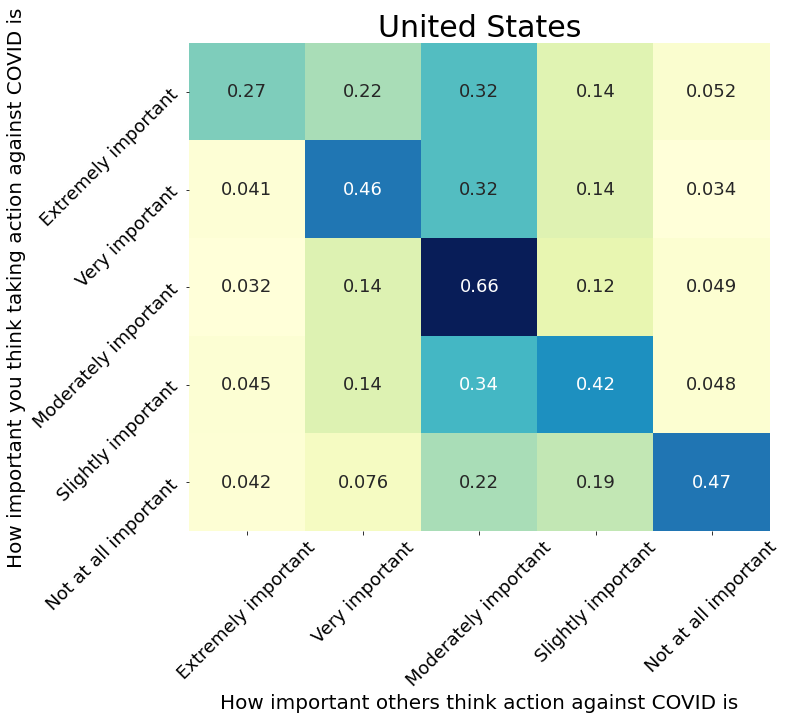

In [44]:
fig, ax = plt.subplots(1,1, figsize=[11,10])

i = 0; j = 0;
ij = [(0,0),(0,1)]
country = "US"
country_name = "United States"
#for country in ["US","JP"]:
data = getScatterData(country);
sns.heatmap(data,cmap="YlGnBu",annot=True,annot_kws={"fontsize":18},cbar=False)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5]);
ax.set_xticklabels(keys,fontsize=18,rotation=45)
ax.set_yticks([0.5,1.5,2.5,3.5,4.5]);
ax.set_yticklabels(keys,fontsize=18,rotation=45)
ax.set_title(country_name,fontsize=30)
ax.set_xlabel("How important others think action against COVID is",fontsize=20)
ax.set_ylabel("How important you think taking action against COVID is", fontsize=20)
  
plt.tight_layout()
plt.savefig("figs/mismatch_index_US.jpg")

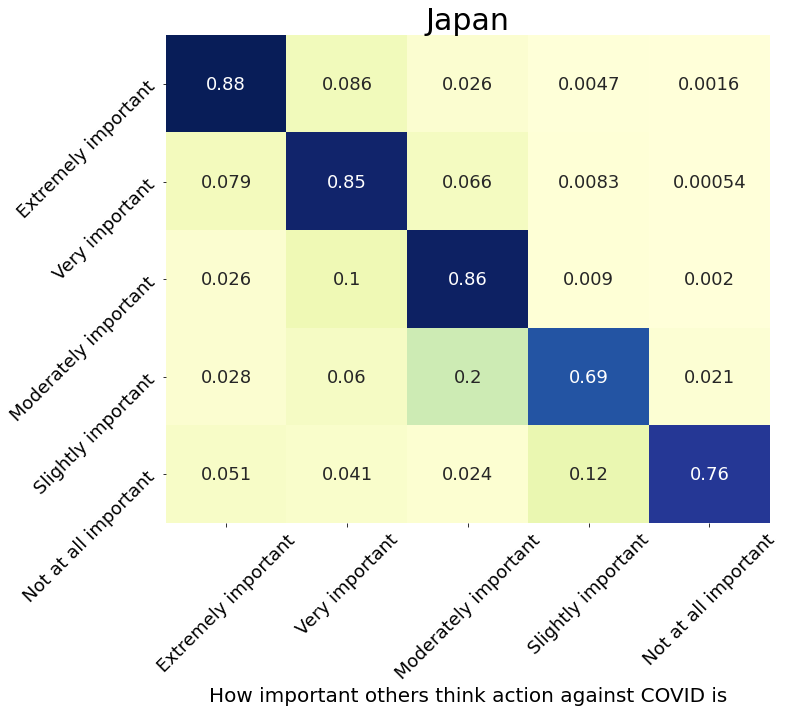

In [45]:
fig, ax = plt.subplots(1,1, figsize=[11,10])

i = 0; j = 0;
ij = [(0,0),(0,1)]
country = "JP"
country_name = "Japan"
#for country in ["US","JP"]:
data = getScatterData(country);
sns.heatmap(data,cmap="YlGnBu",annot=True,annot_kws={"fontsize":18},cbar=False)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5]);
ax.set_xticklabels(keys,fontsize=18,rotation=45)
ax.set_yticks([0.5,1.5,2.5,3.5,4.5]);
ax.set_yticklabels(keys,fontsize=18,rotation=45)
ax.set_title(country_name,fontsize=30)
#ax.set_xlabel("community_action_norms")
#ax.set_ylabel("community_action_importance")
ax.set_xlabel("How important others think action against COVID is",fontsize=20)
  
plt.tight_layout()
plt.savefig("figs/mismatch_index_JP.jpg")

# plot effective sample size

In [46]:
data = pd.read_csv("data/effective_sample_size_timeseries.txt")
data1 = data.T
data1.columns = list(data["country"])
data2 = data1.reset_index()
data2 = data2.drop([0])
data_effective_sample_size = data2.rename(columns={"index": "wave"});
data_effective_sample_size["wave"] = data_effective_sample_size["wave"].apply(convertWaveToDate);
col = data_effective_sample_size.loc[: , "AR":"VN"]
data_effective_sample_size['average'] = col.mean(axis=1)
data_effective_sample_size.head()

,wave,AR,BD,BR,CO,DE,EG,FR,GB,ID,...,NG,PH,PK,PL,RO,TH,TR,US,VN,average
1,2020-07-06,2250.86,898.871,2013.16,2341.26,2167.05,1648.06,2880.46,2494.25,2155.62,...,1624.77,1745.19,1125.63,2312.63,2186.59,2685.63,1911.72,1471.29,1616.71,1967.488870
2,2020-07-20,3307.86,1021.04,2848.11,2173.02,2803.81,1737.64,3110.07,2723.97,2980.46,...,1314.95,1537.04,1440.43,3236.45,2293.55,2673.36,2332.33,2857.68,2560.5,2308.402783
3,2020-08-03,2559.97,971.722,2833.51,2307.25,2724.95,1631.16,2804.03,2556.24,1870.6,...,1636.6,1429.85,987.586,3801.06,2309.56,2643.82,2162.73,2502,1748.7,2147.908696
4,2020-08-17,1810.06,689.855,1944.72,2186.04,1704.9,1171.17,2046.28,2071.86,1999.76,...,1542.84,1381.27,1124.71,1949.42,1515.89,1766.27,2351.52,2009.24,1006.1,1673.717957
5,2020-08-31,1908.97,825.394,1423.03,1685.41,1836.58,1119.69,2308.41,2206.97,1823.31,...,1420.83,1289.94,653.188,1936.87,1616.8,1682.57,1455.4,1874.9,1034.02,1615.461391


In [47]:
data = pd.read_csv("data/sample_size_timeseries.txt")
data1 = data.T
data1.columns = list(data["country"])
data2 = data1.reset_index()
data2 = data2.drop([0])
data_sample_size = data2.rename(columns={"index": "wave"});
data_sample_size["wave"] = data_sample_size["wave"].apply(convertWaveToDate);
col = data_sample_size.loc[: , "AR":"VN"]
data_sample_size['average'] = col.mean(axis=1)
data_sample_size.head()

,wave,AR,BD,BR,CO,DE,EG,FR,GB,ID,...,NG,PH,PK,PL,RO,TH,TR,US,VN,average
1,2020-07-06,3541,4027,3520,4284,3708,4116,3911,3573,4710,...,4212,4282,3959,3511,4225,4462,4142,3249,4831,4027.260870
2,2020-07-20,5064,4476,5007,4597,5243,4672,5248,4441,5927,...,3366,4311,4820,5493,4866,4994,5049,4849,9028,5115.043478
3,2020-08-03,4806,4043,4493,4268,5259,3992,4165,4138,3829,...,3880,3735,3263,5966,4776,4626,4529,3862,5681,4383.521739
4,2020-08-17,3154,2894,3277,4083,3201,3227,3385,3269,4228,...,3931,3647,3868,3287,3226,3418,4852,3253,3121,3512.782609
5,2020-08-31,3127,3496,3399,3008,3342,2965,3364,3159,3441,...,3172,3032,2343,2837,3022,2818,3456,2989,3105,3242.869565


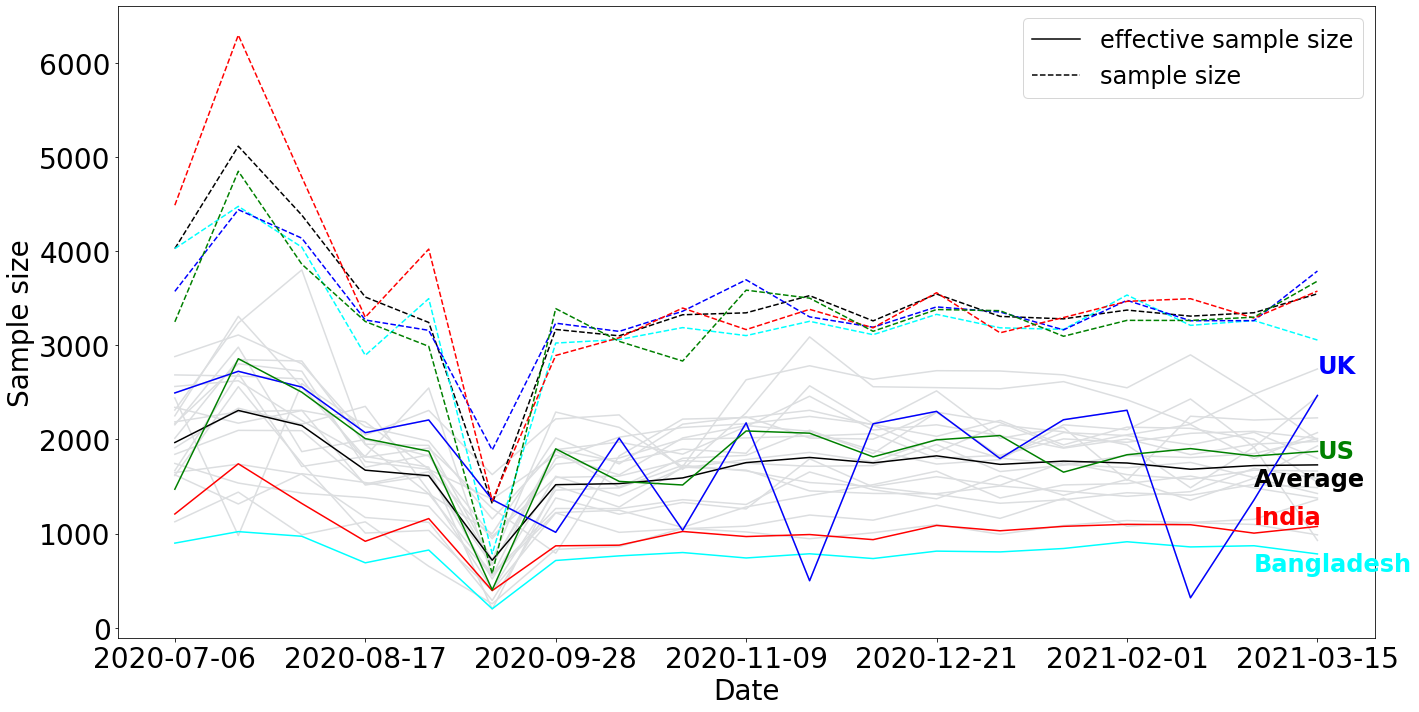

In [48]:
dict_special_countries = {"US":1,"UK":1,"BD":1,"IN":1,"average":1}

fig, ax = plt.subplots(figsize=[20,10])

for country in all_countries:
    y = data_effective_sample_size[country]
    x = range(len(y))
    z = lowess(y, x)
    
    if(country in dict_special_countries):
        continue;
    else:
        plt.plot(x,y,color='#dcdee0')

for country in all_countries:
    y = data_effective_sample_size[country]
    x = range(len(y))
    z = lowess(y, x)
    
    if(country =="average"):
        plt.plot(x,y,color='black',label='effective sample size')
    elif(country=="IN"):
        plt.plot(x,y,color='red')
    elif(country=="US"):
        plt.plot(x,y,color='green')
    elif(country=="GB"):
        plt.plot(x,y,color='blue')
    elif(country=="BD"):
        plt.plot(x,y,color='cyan')

    y1 = data_sample_size[country]
    x1 = range(len(y1))
    z1 = lowess(y1, x1)
    
    if(country=="average"):
        plt.plot(x1,y1,'--',color='black',label='sample size')
    elif(country=="IN"):
        plt.plot(x1,y1,'--',color='red')
    elif(country=="US"):
        plt.plot(x1,y1,'--',color='green')
    elif(country=="GB"):
        plt.plot(x1,y1,'--',color='blue')
    elif(country=="BD"):
        plt.plot(x1,y1,'--',color='cyan')
    
dates_x_axis = []
x_ticks = []
for ix in range(0,len(all_dates),3):
    dates_x_axis.append(all_dates[ix]);
    x_ticks.append(ix);

ax.set_xticks(x_ticks)
ax.set_xticklabels(dates_x_axis,rotation=0,fontsize=25)    

plt.ylabel("Sample size",fontsize=28);
ax.annotate('Average', (17, 1500), fontsize=24,weight='bold')
ax.annotate('UK', (18, 2700), fontsize=24,weight='bold',color="blue")
ax.annotate('Bangladesh', (17, 600), fontsize=24,weight='bold',color="cyan")
ax.annotate('India', (17, 1100), fontsize=24,weight='bold',color="red")
ax.annotate('US', (18, 1800), fontsize=24,weight='bold',color="green")
plt.xlabel("Date",fontsize=28);
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)
plt.legend(fontsize=24)
plt.tight_layout()
plt.savefig("figs/sample_size.jpg")
plt.show()

<ipython-input-49-03b0dff27a10>:48: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


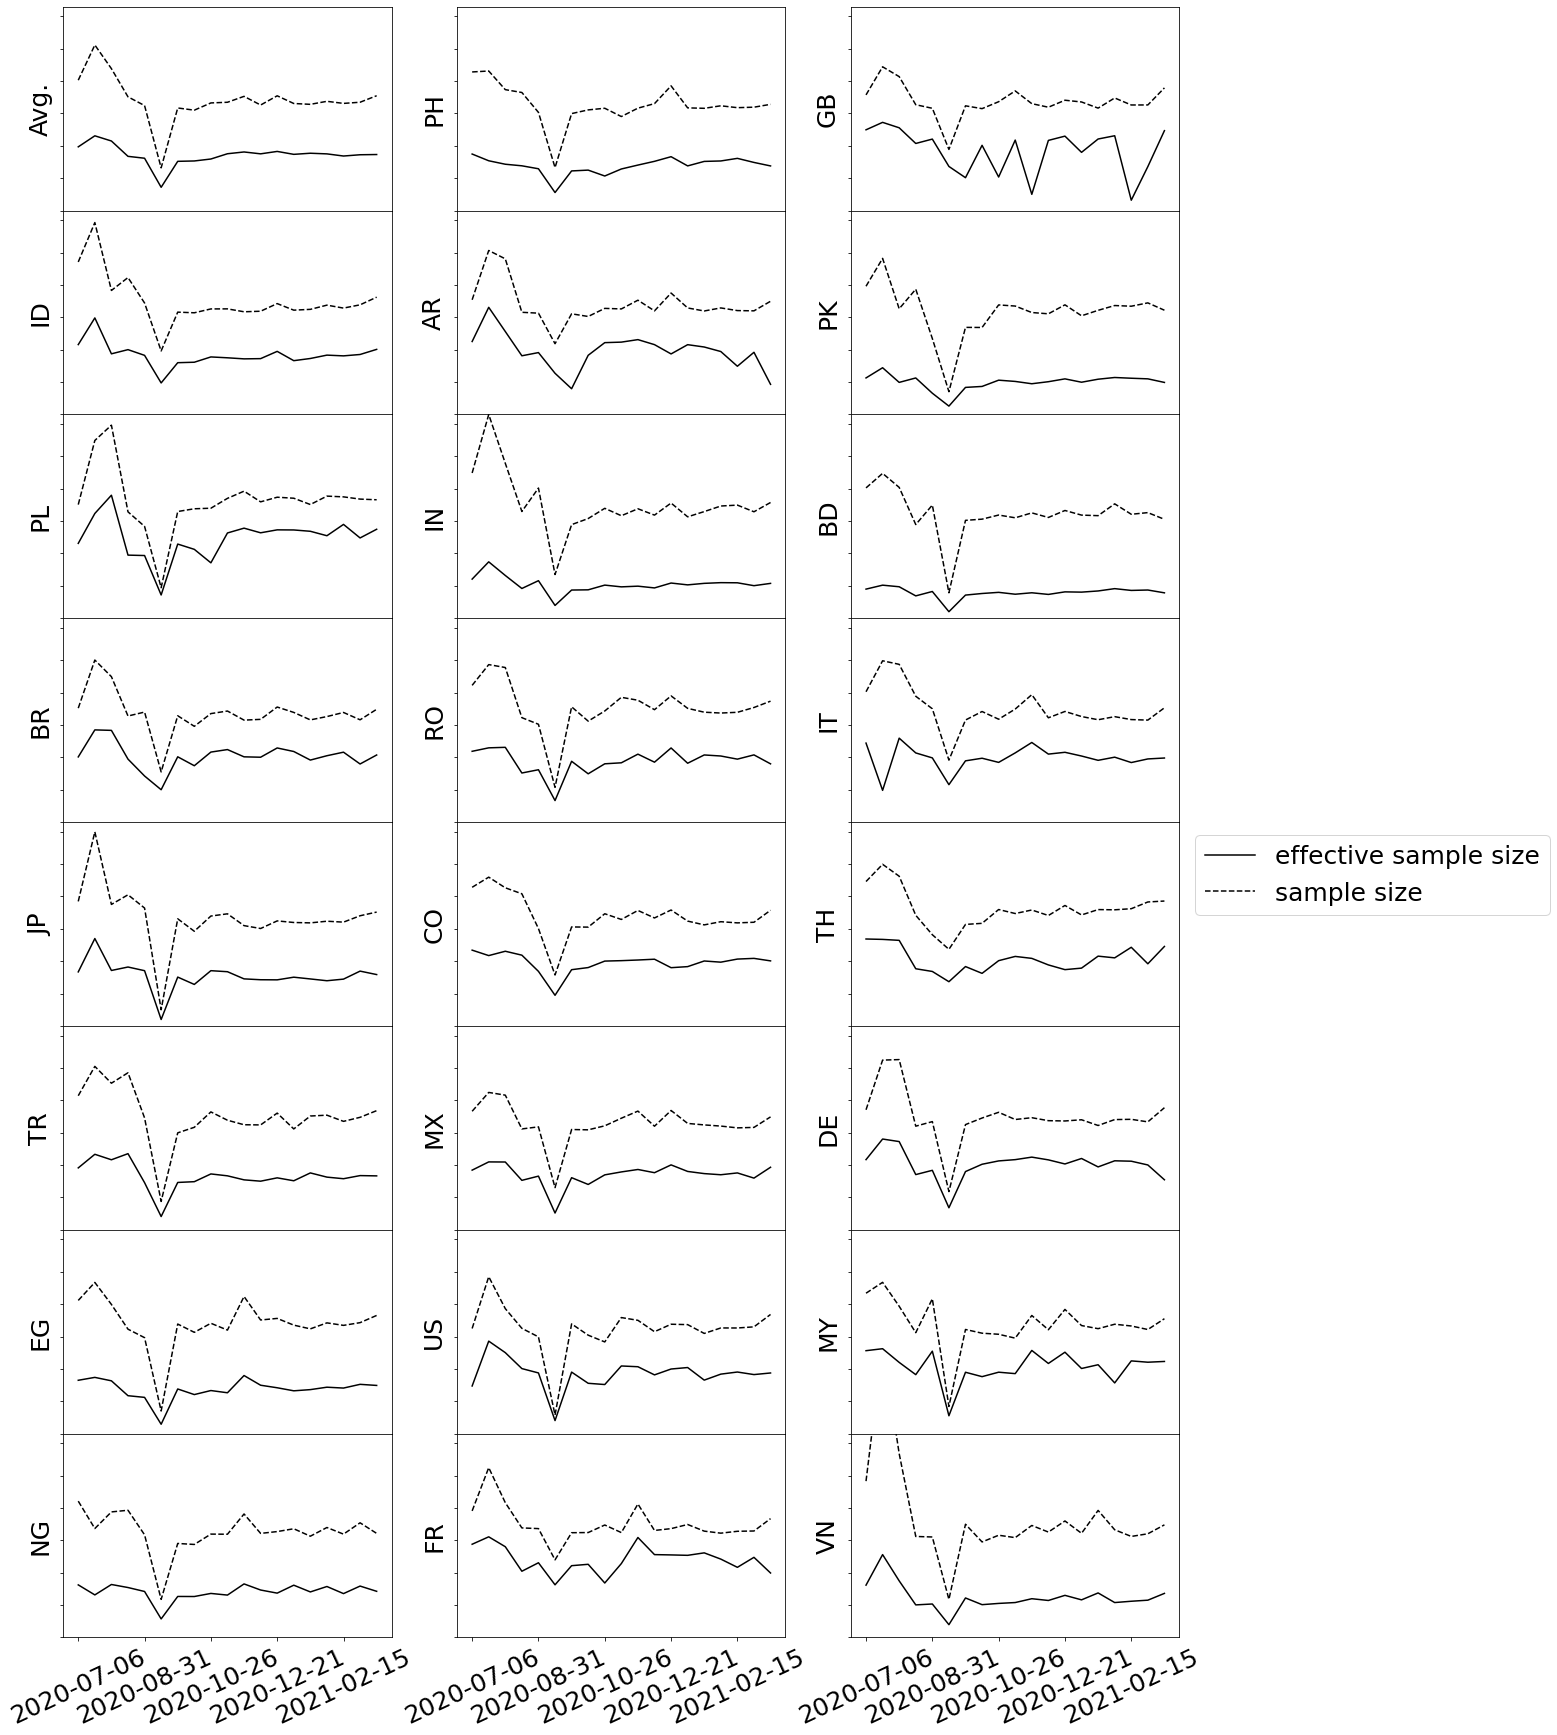

In [49]:
# SAME plot but per country (for the Appendix)

fig = plt.figure(figsize=[20,30])
gs = fig.add_gridspec(8, 3, hspace=0)
axs = gs.subplots(sharex=True)

i = 0; j = 0;
index = 0;
dates_x_axis = []
x_ticks = []
for ix in range(0,len(all_dates),4):
    dates_x_axis.append(all_dates[ix]);
    x_ticks.append(ix);

for country in all_countries:
    y = data_effective_sample_size[country]
    x = np.array(range(len(y)))
    y1 = data_sample_size[country]
    x1 = range(len(y1))

    axs[i,j].plot(x,y,color='black',label='effective sample size')
    axs[i,j].plot(x1,y1,'--',color='black',label='sample size')

    axs[i,j].set_yticklabels([])
    axs[i,j].set_xticklabels([])
    axs[i,j].set_xlabel("")
    axs[i,j].set_ylim(0,6300)
    if(all_countries[index]=="average"):
            axs[i,j].set_ylabel("Avg.",fontsize=25)
    else:
        axs[i,j].set_ylabel(all_countries[index],fontsize=25)

    if(i==7):
        axs[i,j].set_xticks(x_ticks)
        axs[i,j].set_xticklabels(dates_x_axis,rotation=25,fontsize=25)
        
    i += 1;
    j += 1;
    i = i%8;
    j = j%3;
    index += 1;


handles, labels = axs[0,0].get_legend_handles_labels()
plt.legend(handles=handles, bbox_to_anchor=(1.01, 4), loc='upper left',fontsize=25);#, prop=fontP)
plt.xlabel("")
plt.minorticks_off()
plt.tight_layout()

plt.savefig("figs/sample_size_all.jpg")
plt.show()

# plot conversion rate

In [50]:
data = pd.read_csv("data/survey_conversion_timeseries.txt")
data_conversion = data.pivot(index='wave', columns='country', values='unique_invitation_impression').reset_index()
col = data_conversion.loc[: , "AR":"VN"]
data_conversion['average'] = col.mean(axis=1)
data_conversion.tail()

country,wave,AR,BD,BR,CO,DE,EG,FR,GB,ID,...,NG,PH,PK,PL,RO,TH,TR,US,VN,average
14,15,80.563252,492.944508,57.924512,134.514352,56.978667,360.411518,98.417558,38.504639,436.268879,...,722.848493,672.488643,664.284130,215.158296,110.955745,237.081743,413.586512,85.029905,383.793727,283.539019
15,16,87.749360,524.154711,68.924722,157.771029,62.697467,406.015949,106.856937,41.210426,477.265995,...,759.615159,736.394815,712.800484,227.778999,125.348556,334.946542,440.230378,85.379340,231.401577,306.228732
16,17,91.882370,500.583747,65.682544,187.372020,62.844938,419.940543,116.595198,41.058722,556.251920,...,1052.314939,738.698999,764.027409,222.499386,133.362640,357.465099,404.361725,88.870968,278.081266,329.314104
17,18,87.302924,500.761117,51.925422,200.350143,61.181195,423.046349,112.442774,45.277857,554.475546,...,1054.805399,685.497493,661.718709,209.578340,119.858080,381.087188,426.977954,89.206525,521.313263,332.797515
18,19,80.803600,494.248414,48.075806,191.380005,58.889028,413.065060,108.106121,47.966822,565.456455,...,1133.054692,600.482796,518.785377,167.303038,104.369403,394.449064,405.212467,91.476576,645.605855,328.680200


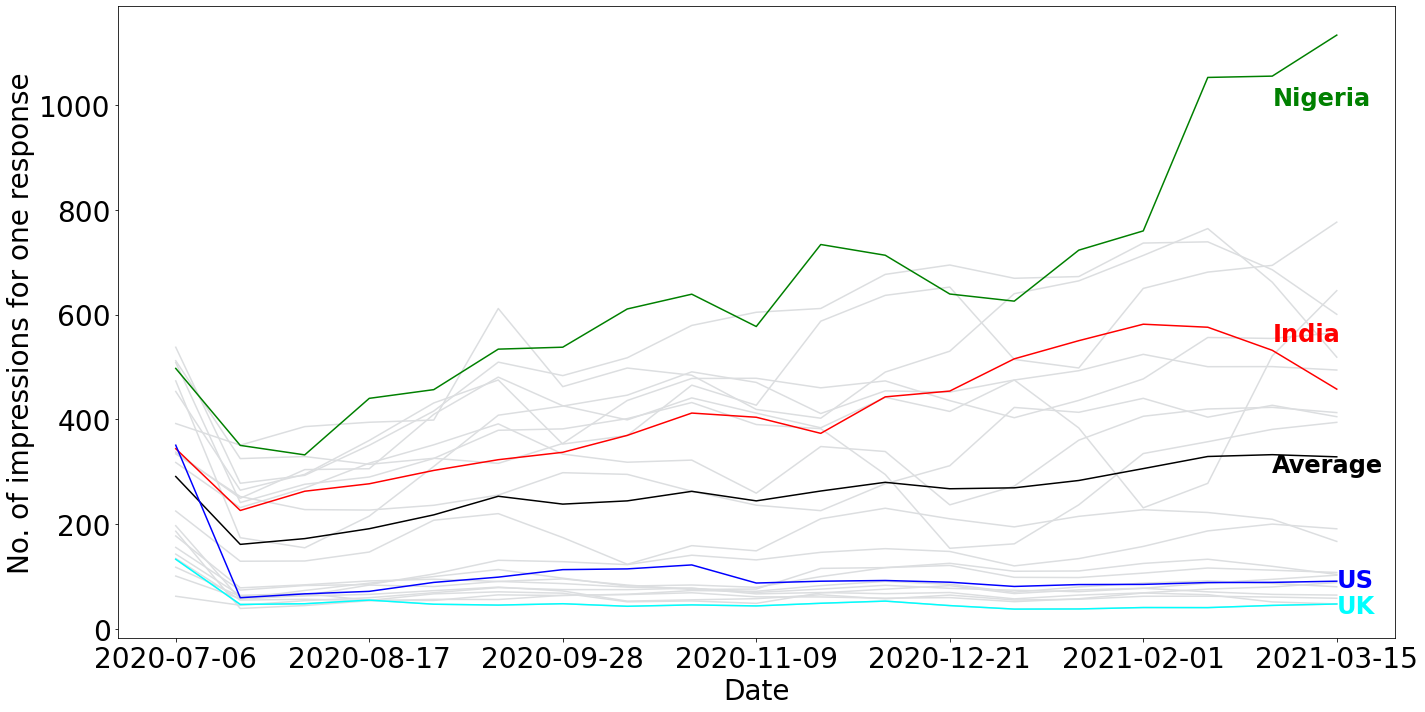

In [51]:
fig, ax = plt.subplots(figsize=[20,10])
developed_countries = set(['DE', 'FR', 'GB', 'IT', 'US','PL','JP','RO','TR'])
developing_countries = set(['AR','BD', 'BR', 'EG', 'ID', 'IN', 'MX', 'NG', 'PH', 'PK', 'TH', 'VN','CO','MY'])
asian_countries = set(['BD' 'ID', 'IN', 'MY', 'PH', 'PK', 'TH', 'VN'])

dict_special_countries = {"US":1,"UK":1,"NG":1,"IN":1,"average":1}

for country in all_countries:
    y = data_conversion[country]
    x = range(len(y))
    z = lowess(y, x)

    if(country in dict_special_countries):
        continue;
    else:
        plt.plot(x,y,color='#dcdee0')

for country in all_countries:
    y = data_conversion[country]
    x = range(len(y))
    z = lowess(y, x)
    
    if(country=="average"):
        plt.plot(x,y,color='black')
    elif(country=="IN"):
        plt.plot(x,y,color='red')
    elif(country=="NG"):
        plt.plot(x,y,color='green')
    elif(country=="US"):
        plt.plot(x,y,color='blue')
    elif(country=="GB"):
        plt.plot(x,y,color='cyan')

dates_x_axis = []
x_ticks = []
for ix in range(0,len(all_dates),3):
    dates_x_axis.append(all_dates[ix]);
    x_ticks.append(ix);

ax.set_xticks(x_ticks)
ax.set_xticklabels(dates_x_axis,rotation=0,fontsize=25)

    
plt.ylabel("No. of impressions for one response",fontsize=28);
ax.annotate('Average', (17, 300), fontsize=24,weight='bold')
ax.annotate('Nigeria', (17, 1000), fontsize=24,weight='bold',color="green")
ax.annotate('India', (17, 550), fontsize=24,weight='bold',color="red")
ax.annotate('US', (18, 80), fontsize=24,weight='bold',color="blue")
ax.annotate('UK', (18, 30), fontsize=24,weight='bold',color="cyan")
plt.xlabel("Date",fontsize=28);
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)
plt.tight_layout()
plt.savefig("figs/conversion.jpg")
plt.show()

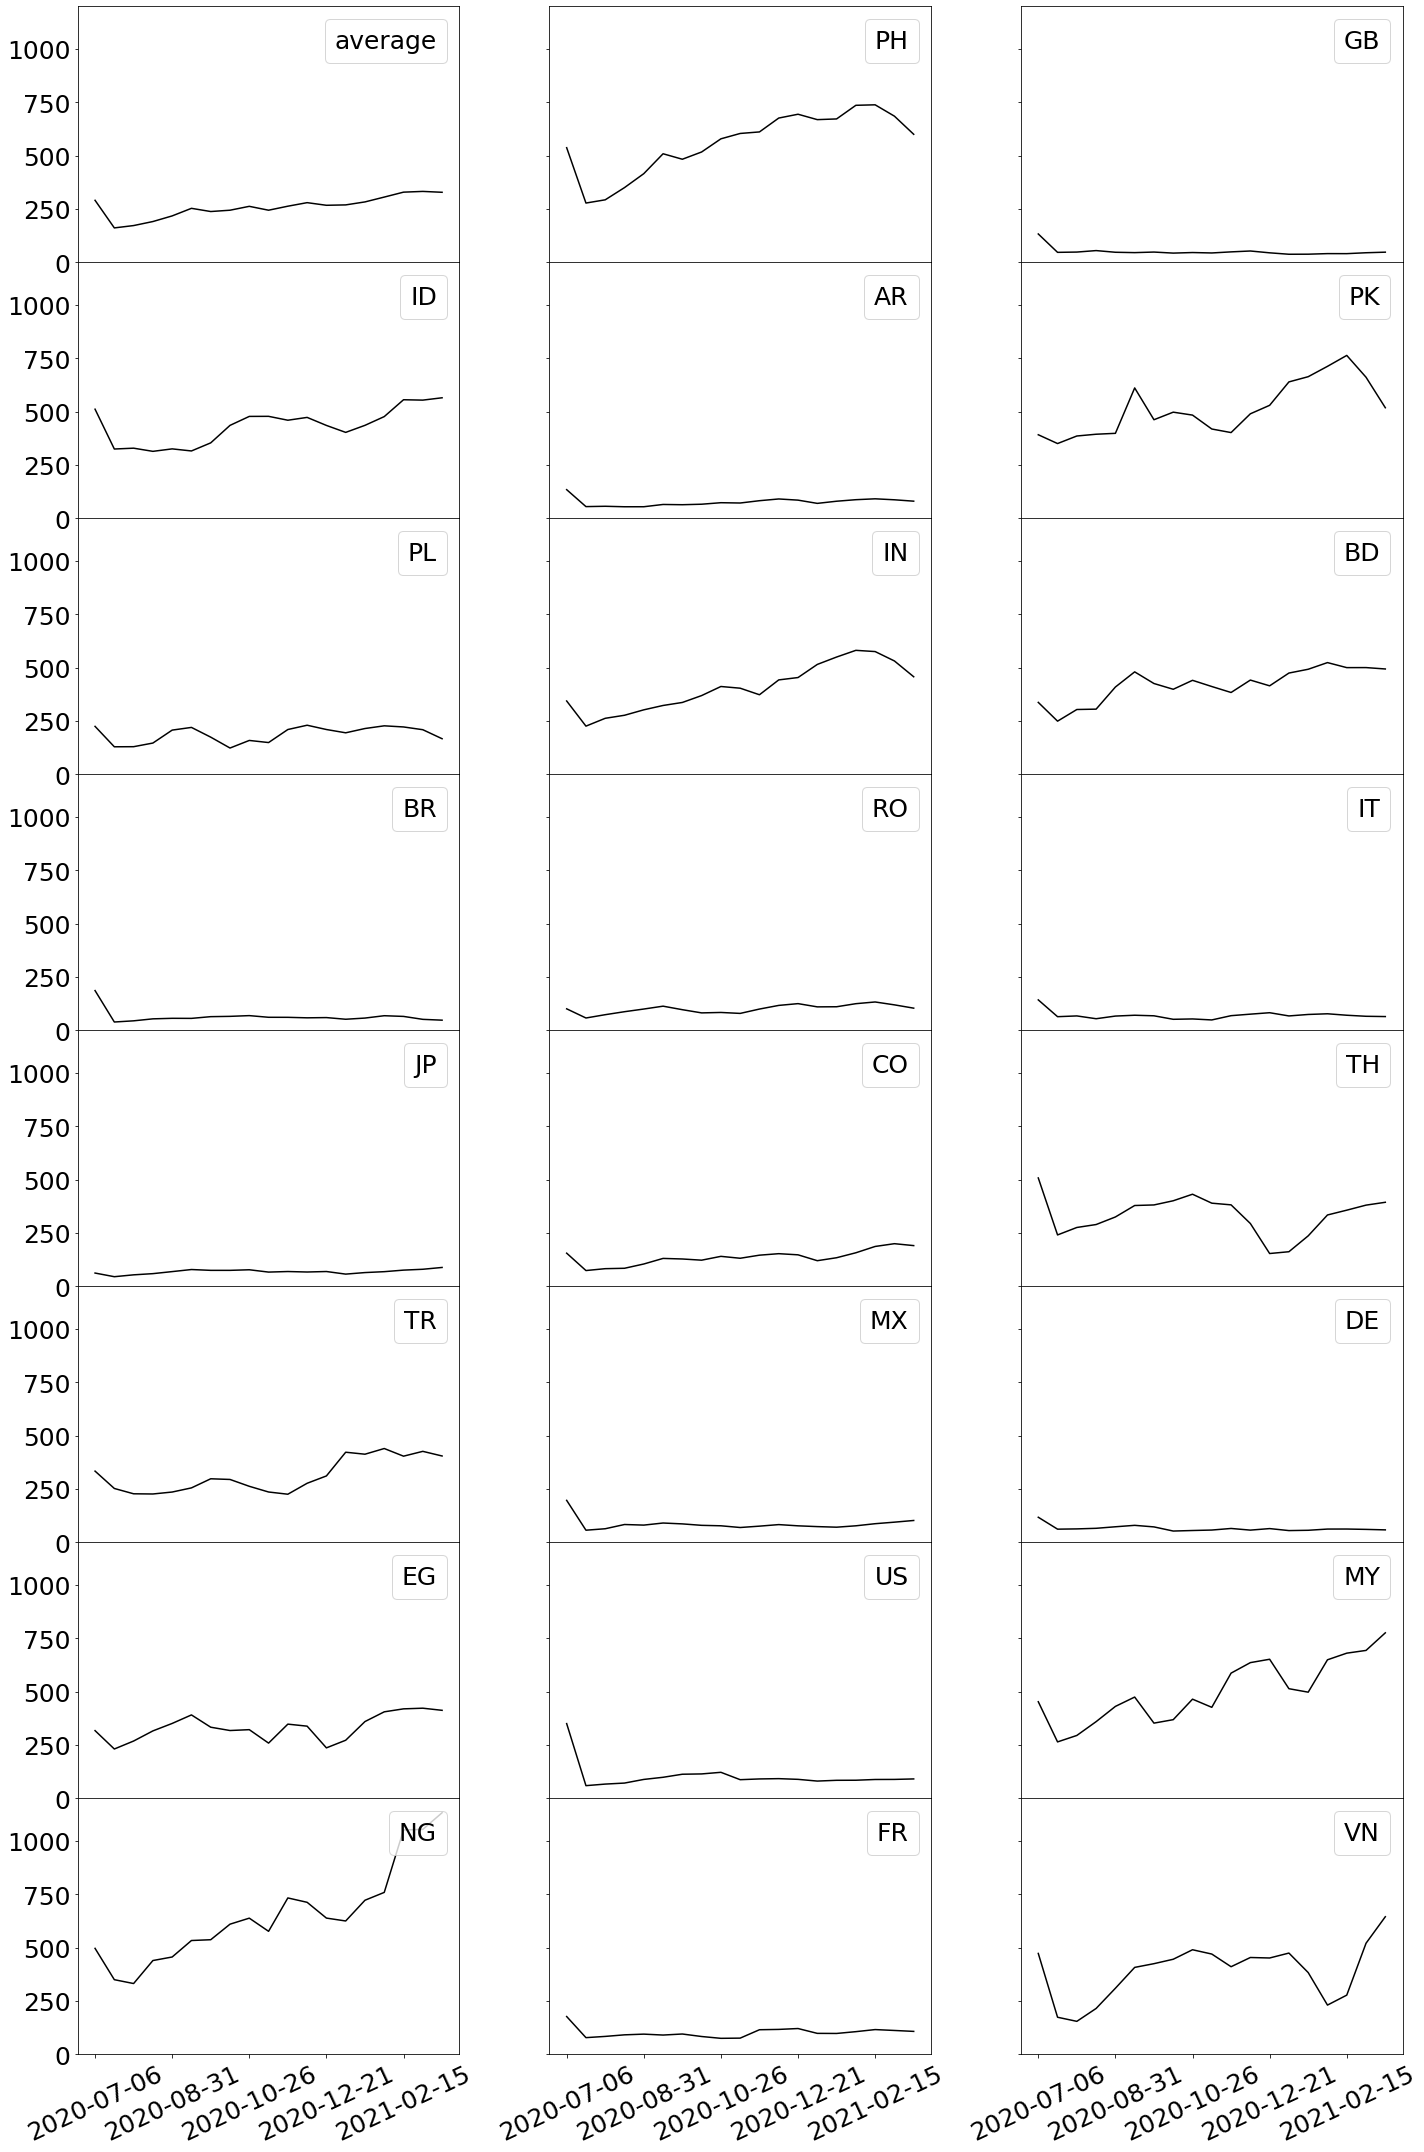

In [52]:
# SAME plot but per country (for the Appendix)

# SAME plot but per country

fig = plt.figure(figsize=[20,30])
gs = fig.add_gridspec(8, 3, hspace=0)
axs = gs.subplots(sharex=True,sharey=True)

i = 0; j = 0;
index = 0;
dates_x_axis = []
x_ticks = []
for ix in range(0,len(all_dates),4):
    dates_x_axis.append(all_dates[ix]);
    x_ticks.append(ix);

for country in all_countries:
    y = data_conversion[country]
    x = np.array(range(len(y)))
    axs[i,j].plot(x,y,color='black',label=country)
    axs[i,j].tick_params(axis='y', which='major', labelsize=25)

    axs[i,j].set_xticklabels([])
    axs[i,j].set_xlabel("")
    axs[i,j].set_ylim(0,1200)

    if(i==7):
        axs[i,j].set_xticks(x_ticks)
        axs[i,j].set_xticklabels(dates_x_axis,rotation=25,fontsize=25)

    leg = axs[i,j].legend(fontsize=25,loc='upper right',handlelength=0,handletextpad=0,fancybox=True)
    for item in leg.legendHandles:
        item.set_visible(False)

    i += 1;
    j += 1;
    i = i%8;
    j = j%3;
    index += 1;

plt.xlabel("")
plt.minorticks_off()
plt.tight_layout()

plt.savefig("figs/conversion_all.jpg")
plt.show()

# plot news sources/mediums consumption and trust

In [3]:
## uses data from two questions: "Information Medium: In the past week, from which of the following, if any, have you received news and information about COVID-19? Select all that apply."
## and "Information Sources: In the past week, from which of the following, if any, have you received news and information about COVID-19? Select all that apply."


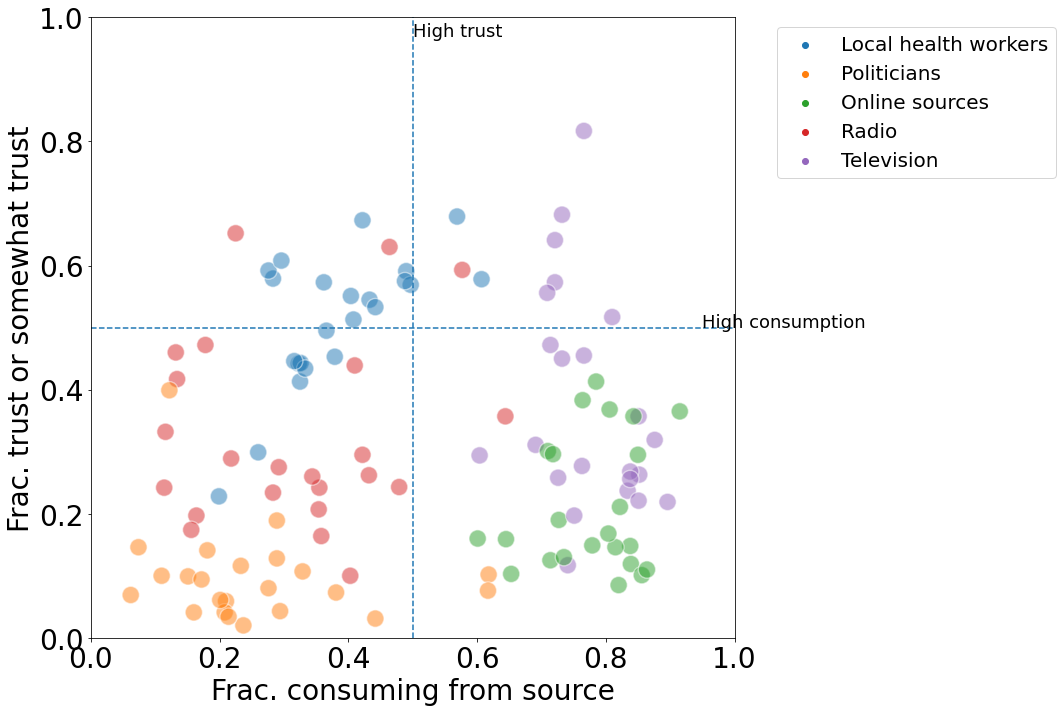

In [53]:
fig, ax = plt.subplots(figsize=[15,10])
#sns.color_palette("hls", 8)
plt.axvline(x=0.5,linestyle='--')
plt.axhline(y=0.5,linestyle='--')
ax.annotate('High trust', (0.5, 0.97), fontsize=18)
ax.annotate('High consumption', (0.95, 0.5), fontsize=18)
#data_news_sources = pd.read_csv("tmp/news_sources_consume_trust.txt");
data_news_sources = pd.read_csv("data/news_sources_mediums_consume_trust.txt");


data_news_sources["val"].replace({'online_sources':'Online sources',
                                  'local_health_workers':'Local health workers',
                                 'television':'Television',
                                 'radio':'Radio',
                                 'politicians':'Politicians'}
                         ,inplace=True);

is_dontknow_personally = data_news_sources["val"]=='ordinary_people_i_do_not_know_personally'
data_news_sources = data_news_sources[~is_dontknow_personally]
is_know_personally = data_news_sources["val"]=='ordinary_people_i_know_personally'
data_news_sources = data_news_sources[~is_know_personally]
government_health_authorities = data_news_sources["val"]=='government_health_authorities'
data_news_sources = data_news_sources[~government_health_authorities]
messaging_apps = data_news_sources["val"]=='messaging_apps'
data_news_sources = data_news_sources[~messaging_apps]
journalists = data_news_sources["val"]=='journalists'
data_news_sources = data_news_sources[~journalists]
scientists = data_news_sources["val"]=='scientists'
data_news_sources = data_news_sources[~scientists]
world_health_organization = data_news_sources["val"]=='world_health_organization'
data_news_sources = data_news_sources[~world_health_organization]
newspapers = data_news_sources["val"]=='newspapers'
data_news_sources = data_news_sources[~newspapers]


sns.scatterplot(data = data_news_sources, x = "consume", y = "trust", hue = "val", alpha=0.5, s=300)
plt.ylabel("Frac. trust or somewhat trust",fontsize=28);
plt.xlabel("Frac. consuming from source",fontsize=28);
plt.xlim(0,1);
plt.ylim(0,1);
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)
plt.legend(fontsize=20,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("figs/news_sources.jpg")

# compute gender, age breakdowns per country

In [54]:
# unweighted

data_demographics = pd.read_csv("data/demographics_data.csv",sep="\t")
country_list = []; gender_list = []; sample_size = [];
age_1830 = []; age_3140 = []; age_4150 = []; age_5160 = []; age_6170 = []; age_7180 = [];
education_college = []; education_secondary_school = []; education_graduate_school = [];
education_primary_school = []; education_less_than_primary = [];
for country in list(dict_all_countries.keys()):
    data_per_country = data_demographics[data_demographics["country"]==country];
    dict_gender = data_per_country["gender"].value_counts(normalize=True).to_dict();
    dict_age = data_per_country["age"].value_counts(normalize=True).to_dict();
    dict_education = data_per_country["education"].value_counts(normalize=True).to_dict();
    
    country_list.append(country);
    sample_size.append(data_per_country.shape[0]);
    gender_list.append(round(dict_gender["female"]*100,1));
    age_1830.append(round((dict_age["under 20"] + dict_age["20-30"])*100,1));
    age_3140.append(round(dict_age["31-40"]*100,1));
    age_4150.append(round(dict_age["41-50"]*100,1));
    age_5160.append(round(dict_age["51-60"]*100,1));
    age_6170.append(round(dict_age["61-70"]*100,1));
    age_7180.append(round((dict_age["over 80"] + dict_age["71-80"])*100,1));
    
    education_college.append(round(dict_education["college"]*100,1));
    education_secondary_school.append(round(dict_education["secondary_school"]*100,1));
    education_graduate_school.append(round(dict_education["graduate_school"]*100,1));
    education_primary_school.append(round(dict_education["primary_school"]*100,1));
    education_less_than_primary.append(round(dict_education["less_than_primary"]*100,1));
    
df_latex = pd.DataFrame(dict(country=country_list,sample_size=sample_size,fraction_female=gender_list,
                       age_1830=age_1830,age_3140=age_3140,age_4150=age_4150,
                       age_5160=age_5160,age_6170=age_6170,over_80=age_7180,
                        fraction_college=education_college,fraction_secondary_school=education_secondary_school,
                        fraction_graduate_school=education_graduate_school,
                        fraction_primary_school=education_primary_school,
                        fraction_less_than_primary=education_less_than_primary))
print(df_latex.to_latex(index=False))

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
country &  sample\_size &  fraction\_female &  age\_1830 &  age\_3140 &  age\_4150 &  age\_5160 &  age\_6170 &  over\_80 &  fraction\_college &  fraction\_secondary\_school &  fraction\_graduate\_school &  fraction\_primary\_school &  fraction\_less\_than\_primary \\
\midrule
     AF &         5005 &              6.7 &      58.8 &      23.6 &       9.5 &       4.1 &       1.4 &      1.4 &              51.6 &                        8.6 &                      30.6 &                      4.8 &                         4.4 \\
     AO &         5688 &             30.0 &      30.3 &      34.7 &      19.5 &      11.2 &       3.5 &      0.7 &              60.8 &                       26.6 &                      10.7 &                      1.2 &                         0.7 \\
     AR &        62294 &             62.9 &      23.1 &      22.3 &      20.5 &      17.6 &      11.5 &      4.8 &              33.2 &                       49.5 &                   

In [55]:
#weighted

country_list = []; gender_list = []; sample_size = [];
age_1830 = []; age_3140 = []; age_4150 = []; age_5160 = []; age_6170 = []; age_7180 = [];
education_college = []; education_secondary_school = []; education_graduate_school = [];
education_primary_school = []; education_less_than_primary = [];
for country in list(dict_all_countries.keys()):
    data_per_country = data_demographics[data_demographics["country"]==country];
    dict_gender = data_per_country["gender"].value_counts(normalize=True).to_dict();
    dict_age = data_per_country["age"].value_counts(normalize=True).to_dict();
    dict_education = data_per_country["education"].value_counts(normalize=True).to_dict();
    
    country_list.append(country);
    sample_size.append(data_per_country.shape[0]);
    gender_list.append(round(dict_gender["female"]*100,1));
    age_1830.append(round((dict_age["under 20"] + dict_age["20-30"])*100,1));
    age_3140.append(round(dict_age["31-40"]*100,1));
    age_4150.append(round(dict_age["41-50"]*100,1));
    age_5160.append(round(dict_age["51-60"]*100,1));
    age_6170.append(round(dict_age["61-70"]*100,1));
    age_7180.append(round((dict_age["over 80"] + dict_age["71-80"])*100,1));
    
    education_college.append(round(dict_education["college"]*100,1));
    education_secondary_school.append(round(dict_education["secondary_school"]*100,1));
    education_graduate_school.append(round(dict_education["graduate_school"]*100,1));
    education_primary_school.append(round(dict_education["primary_school"]*100,1));
    education_less_than_primary.append(round(dict_education["less_than_primary"]*100,1));
    
df_latex = pd.DataFrame(dict(country=country_list,sample_size=sample_size,fraction_female=gender_list,
                       age_1830=age_1830,age_3140=age_3140,age_4150=age_4150,
                       age_5160=age_5160,age_6170=age_6170,over_80=age_7180,
                        fraction_college=education_college,fraction_secondary_school=education_secondary_school,
                        fraction_graduate_school=education_graduate_school,
                        fraction_primary_school=education_primary_school,
                        fraction_less_than_primary=education_less_than_primary))
print(df_latex.to_latex(index=False))

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
country &  sample\_size &  fraction\_female &  age\_1830 &  age\_3140 &  age\_4150 &  age\_5160 &  age\_6170 &  over\_80 &  fraction\_college &  fraction\_secondary\_school &  fraction\_graduate\_school &  fraction\_primary\_school &  fraction\_less\_than\_primary \\
\midrule
     AF &         5005 &              6.7 &      58.8 &      23.6 &       9.5 &       4.1 &       1.4 &      1.4 &              51.6 &                        8.6 &                      30.6 &                      4.8 &                         4.4 \\
     AO &         5688 &             30.0 &      30.3 &      34.7 &      19.5 &      11.2 &       3.5 &      0.7 &              60.8 &                       26.6 &                      10.7 &                      1.2 &                         0.7 \\
     AR &        62294 &             62.9 &      23.1 &      22.3 &      20.5 &      17.6 &      11.5 &      4.8 &              33.2 &                       49.5 &                   